# **Data Analisis**

In [1]:
import numpy as np
from numpy.random import seed
import pandas as pd
seed(1)
import tensorflow
tensorflow.random.set_seed(2)

#Mengakses Google Drive
from IPython.display import Image
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#Memanggil dataset Tourism_arrival.csv yang ada pada folder Laporan dan Program yang berada di dalam google drive
dataset = pd.read_csv('/content/drive/My Drive/final_program/Tourism_arrival.csv')
dataset

,Country,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Albania,304,287,119,184,371,317,354,470,557,...,2417,2932,3514,3256,3673,4131,4736,5118,5927,6406
1,Algeria,520,605,635,678,749,866,901,988,1166,...,207,2395,2634,2733,2301,171,2039,2451,2657,2371
2,American Samoa,0,0,0,0,0,0,0,0,0,...,403,413,502,493,516,471,383,423,518,0
3,Andorra,0,0,0,0,9422,10991,11351,11507,11601,...,8551,7983,79,7676,7797,785,8025,8152,8328,0
4,Anguilla,107,86,114,114,107,112,105,111,109,...,118,124,129,151,177,186,176,151,87,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Vanuatu,82,103,81,78,96,106,106,99,102,...,238,249,321,357,329,287,351,333,350,256
158,Venezuela Bolivarian Republic Of,879,960,933,813,702,602,792,590,435,...,535,625,1061,1085,967,882,681,429,0,0
159,Viet Nam,1351,1607,1716,152,1782,214,233,2628,2429,...,505,6014,6848,7572,7874,7944,10013,12922,15498,18009
160,Yemen,0,0,0,0,0,0,0,0,0,...,1035,1175,1282,1323,1218,398,0,0,0,0


In [3]:
# Merubah data kosong atau nol menjadi Nan dengan missing values lalu memanggilnya
missing_values = ["0"]
data_clean = pd.read_csv('/content/drive/My Drive/final_program/Tourism_arrival.csv', na_values = missing_values, index_col="Country")
data_clean.dropna(inplace=True)
data_clean

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,,
Albania,304.0,287.0,119.0,184.0,371.0,317.0,354.0,470.0,557.0,645.0,...,2417.0,2932.0,3514.0,3256.0,3673.0,4131.0,4736.0,5118.0,5927.0,6406.0
Algeria,520.0,605.0,635.0,678.0,749.0,866.0,901.0,988.0,1166.0,1234.0,...,207.0,2395.0,2634.0,2733.0,2301.0,171.0,2039.0,2451.0,2657.0,2371.0
Anguilla,107.0,86.0,114.0,114.0,107.0,112.0,105.0,111.0,109.0,121.0,...,118.0,124.0,129.0,151.0,177.0,186.0,176.0,151.0,87.0,166.0
Aruba,912.0,957.0,947.0,906.0,972.0,1211.0,1178.0,1225.0,1184.0,1304.0,...,1394.0,1469.0,1481.0,1667.0,1739.0,1832.0,1758.0,1863.0,1897.0,1951.0
Azerbaijan,93.0,210.0,306.0,483.0,602.0,681.0,767.0,834.0,1038.0,1279.0,...,1963.0,2239.0,2484.0,2509.0,2298.0,2006.0,2249.0,2697.0,285.0,3168.0
Bahamas,3239.0,3416.0,3446.0,3348.0,3648.0,4204.0,4183.0,4406.0,4594.0,5004.0,...,5255.0,5588.0,594.0,6151.0,632.0,6112.0,6265.0,6136.0,6622.0,725.0
Bahrain,2311.0,1988.0,26.0,2898.0,328.0,3869.0,4388.0,4831.0,4844.0,5667.0,...,11952.0,6732.0,8062.0,9163.0,10452.0,967.0,10158.0,11374.0,12045.0,11061.0
Bermuda,557.0,570.0,562.0,558.0,549.0,539.0,458.0,484.0,483.0,478.0,...,580.0,652.0,610.0,576.0,580.0,597.0,642.0,688.0,766.0,805.0
Bulgaria,8005.0,6811.0,7543.0,524.0,5056.0,4922.0,5104.0,5563.0,6241.0,6982.0,...,8374.0,8713.0,8867.0,9192.0,9409.0,9317.0,10604.0,11596.0,12368.0,12552.0


In [4]:
#Membuat grafik kedatangan wisatawan dari tahun 1995 sampai 2019
import matplotlib.pyplot as plot
kolom = ["1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012",
         "2013","2014","2015","2016","2017","2018","2019"]
 
judul = ["Kedatangan Wisatawan Tahun 1995",
         "Kedatangan Wisatawan Tahun 1996",
         "Kedatangan Wisatawan Tahun 1997",
         "Kedatangan Wisatawan Tahun 1998",
         "Kedatangan Wisatawan Tahun 1999",
         "Kedatangan Wisatawan Tahun 2000",
         "Kedatangan Wisatawan Tahun 2001",
         "Kedatangan Wisatawan Tahun 2002",
         "Kedatangan Wisatawan Tahun 2003",
         "Kedatangan Wisatawan Tahun 2004",
         "Kedatangan Wisatawan Tahun 2005",
         "Kedatangan Wisatawan Tahun 2006",
         "Kedatangan Wisatawan Tahun 2007",
         "Kedatangan Wisatawan Tahun 2008",
         "Kedatangan Wisatawan Tahun 2009",
         "Kedatangan Wisatawan Tahun 2010",
         "Kedatangan Wisatawan Tahun 2011",
         "Kedatangan Wisatawan Tahun 2012",
         "Kedatangan Wisatawan Tahun 2013",
         "Kedatangan Wisatawan Tahun 2014",
         "Kedatangan Wisatawan Tahun 2015",
         "Kedatangan Wisatawan Tahun 2016",
         "Kedatangan Wisatawan Tahun 2017",
         "Kedatangan Wisatawan Tahun 2018",
         "Kedatangan Wisatawan Tahun 2019"]
for i in range(25):

  ax = data_clean.plot(figsize=(30,10), fontsize=14, title=judul[i], ylabel='jumlah', xticks=range(0,53), y=kolom[i], grid=True, rot=90)
  ax.set_title(judul[i], fontdict={'fontsize':18})
  ax

Output hidden; open in https://colab.research.google.com to view.

In [5]:
data_clean.to_csv('data_cleaning.csv')

In [6]:
#Memanggil dataset Tourism_arrival.csv yang ada pada folder Laporan dan Program yang berada di dalam google drive
data_cleaning = pd.read_csv('/content/drive/My Drive/final_program/data_cleaning.csv')
data_cleaning

,Country,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Albania,304.0,287.0,119.0,184.0,371.0,317.0,354.0,470.0,557.0,...,2417.0,2932.0,3514.0,3256.0,3673.0,4131.0,4736.0,5118.0,5927.0,6406.0
1,Algeria,520.0,605.0,635.0,678.0,749.0,866.0,901.0,988.0,1166.0,...,207.0,2395.0,2634.0,2733.0,2301.0,171.0,2039.0,2451.0,2657.0,2371.0
2,Anguilla,107.0,86.0,114.0,114.0,107.0,112.0,105.0,111.0,109.0,...,118.0,124.0,129.0,151.0,177.0,186.0,176.0,151.0,87.0,166.0
3,Aruba,912.0,957.0,947.0,906.0,972.0,1211.0,1178.0,1225.0,1184.0,...,1394.0,1469.0,1481.0,1667.0,1739.0,1832.0,1758.0,1863.0,1897.0,1951.0
4,Azerbaijan,93.0,210.0,306.0,483.0,602.0,681.0,767.0,834.0,1038.0,...,1963.0,2239.0,2484.0,2509.0,2298.0,2006.0,2249.0,2697.0,285.0,3168.0
5,Bahamas,3239.0,3416.0,3446.0,3348.0,3648.0,4204.0,4183.0,4406.0,4594.0,...,5255.0,5588.0,594.0,6151.0,632.0,6112.0,6265.0,6136.0,6622.0,725.0
6,Bahrain,2311.0,1988.0,26.0,2898.0,328.0,3869.0,4388.0,4831.0,4844.0,...,11952.0,6732.0,8062.0,9163.0,10452.0,967.0,10158.0,11374.0,12045.0,11061.0
7,Bermuda,557.0,570.0,562.0,558.0,549.0,539.0,458.0,484.0,483.0,...,580.0,652.0,610.0,576.0,580.0,597.0,642.0,688.0,766.0,805.0
8,Bulgaria,8005.0,6811.0,7543.0,524.0,5056.0,4922.0,5104.0,5563.0,6241.0,...,8374.0,8713.0,8867.0,9192.0,9409.0,9317.0,10604.0,11596.0,12368.0,12552.0
9,Cayman Islands,1044.0,1173.0,1248.0,1275.0,1431.0,1385.0,1549.0,1878.0,2113.0,...,1886.0,171.0,1829.0,1721.0,1993.0,2102.0,2097.0,2147.0,2384.0,2334.0


In [7]:
#Mengelompokan jadi 3 kolom dengan fungsi melt : memanipulasi data
data_baru = data_cleaning.melt(id_vars='Country',
             var_name='Tahun',
             value_name='Jumlah')

In [8]:
#Menyimpan data yang sudah di manipulasi, dengan nama dataset_kunjungan_wisatawan.csv
data_baru.to_csv('dataset_kunjungan_wisatawan.csv')

In [9]:
#Menampilkan struktur tabel (baris, kolom, dan tipe data) pada file dataset kunjungan wisatawan.csv
import pandas as pd
import os
with open("/content/drive/My Drive/final_program/dataset_kunjungan_wisatawan.csv", "rb") as d:
  data_frame = pd.read_csv(d)
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   No       1325 non-null   int64 
 1   Country  1325 non-null   object
 2   Tahun    1325 non-null   int64 
 3   Jumlah   1325 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 41.5+ KB


In [10]:
#Menampilkan seluruh isi dataset
pd.set_option('display.max_rows', None)
data_frame

,No,Country,Tahun,Jumlah
0,0,Albania,1995,304
1,1,Algeria,1995,520
2,2,Anguilla,1995,107
3,3,Aruba,1995,912
4,4,Azerbaijan,1995,93
5,5,Bahamas,1995,3239
6,6,Bahrain,1995,2311
7,7,Bermuda,1995,557
8,8,Bulgaria,1995,8005
9,9,Cayman Islands,1995,1044


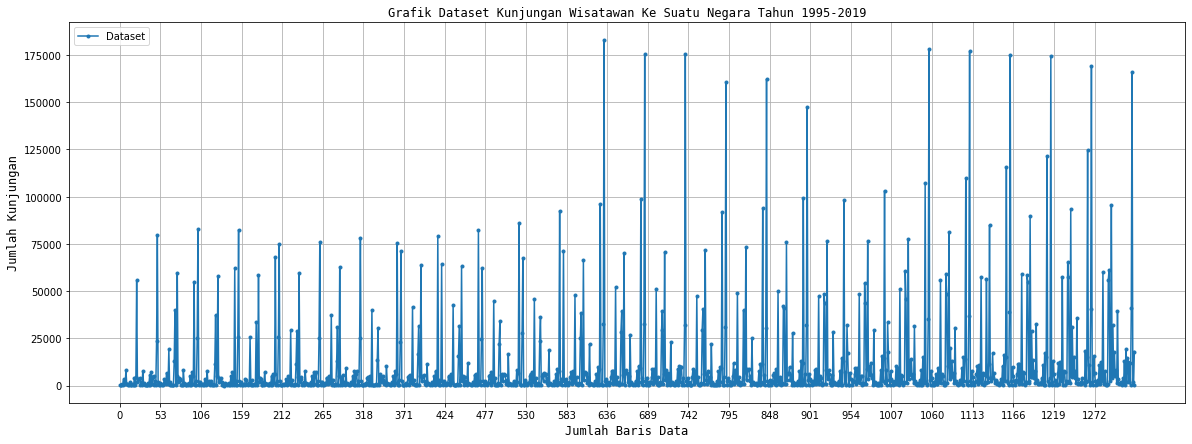

In [11]:
#Memvisualisasikan dataset kunjungan wisatawan kedalam grafik garis
import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))
plt.plot(data_frame['Jumlah'], marker='.')
plt.grid(True)
plt.title('Grafik Dataset Kunjungan Wisatawan Ke Suatu Negara Tahun 1995-2019', size='large', fontname = 'monospace')
plt.xticks(np.arange(0, 1325, 53))
plt.xlabel('Jumlah Baris Data', size='large', fontname = 'monospace')
plt.ylabel('Jumlah Kunjungan', size='large', fontname = 'monospace')
plt.legend(['Dataset'],loc ="upper left")
plt.show()

In [12]:
#Mengubah format dataset kunjungan wisatawan berdasarkan index kolom pertahun
data_frame_per_tahun = data_frame.pivot(index='Country', columns='Tahun', values='Jumlah')
data_frame_per_tahun

Tahun,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,,
Albania,304,287,119,184,371,317,354,470,557,645,...,2417,2932,3514,3256,3673,4131,4736,5118,5927,6406
Algeria,520,605,635,678,749,866,901,988,1166,1234,...,207,2395,2634,2733,2301,171,2039,2451,2657,2371
Anguilla,107,86,114,114,107,112,105,111,109,121,...,118,124,129,151,177,186,176,151,87,166
Aruba,912,957,947,906,972,1211,1178,1225,1184,1304,...,1394,1469,1481,1667,1739,1832,1758,1863,1897,1951
Azerbaijan,93,210,306,483,602,681,767,834,1038,1279,...,1963,2239,2484,2509,2298,2006,2249,2697,285,3168
Bahamas,3239,3416,3446,3348,3648,4204,4183,4406,4594,5004,...,5255,5588,594,6151,632,6112,6265,6136,6622,725
Bahrain,2311,1988,26,2898,328,3869,4388,4831,4844,5667,...,11952,6732,8062,9163,10452,967,10158,11374,12045,11061
Bermuda,557,570,562,558,549,539,458,484,483,478,...,580,652,610,576,580,597,642,688,766,805
Bulgaria,8005,6811,7543,524,5056,4922,5104,5563,6241,6982,...,8374,8713,8867,9192,9409,9317,10604,11596,12368,12552


In [13]:
#Menampilkan kembali struktur tabel (baris, kolom, dan tipe data)
data_frame_per_tahun.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, Albania to Viet Nam
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1995    53 non-null     int64
 1   1996    53 non-null     int64
 2   1997    53 non-null     int64
 3   1998    53 non-null     int64
 4   1999    53 non-null     int64
 5   2000    53 non-null     int64
 6   2001    53 non-null     int64
 7   2002    53 non-null     int64
 8   2003    53 non-null     int64
 9   2004    53 non-null     int64
 10  2005    53 non-null     int64
 11  2006    53 non-null     int64
 12  2007    53 non-null     int64
 13  2008    53 non-null     int64
 14  2009    53 non-null     int64
 15  2010    53 non-null     int64
 16  2011    53 non-null     int64
 17  2012    53 non-null     int64
 18  2013    53 non-null     int64
 19  2014    53 non-null     int64
 20  2015    53 non-null     int64
 21  2016    53 non-null     int64
 22  2017    53 non-null     int64
 23  2018    53

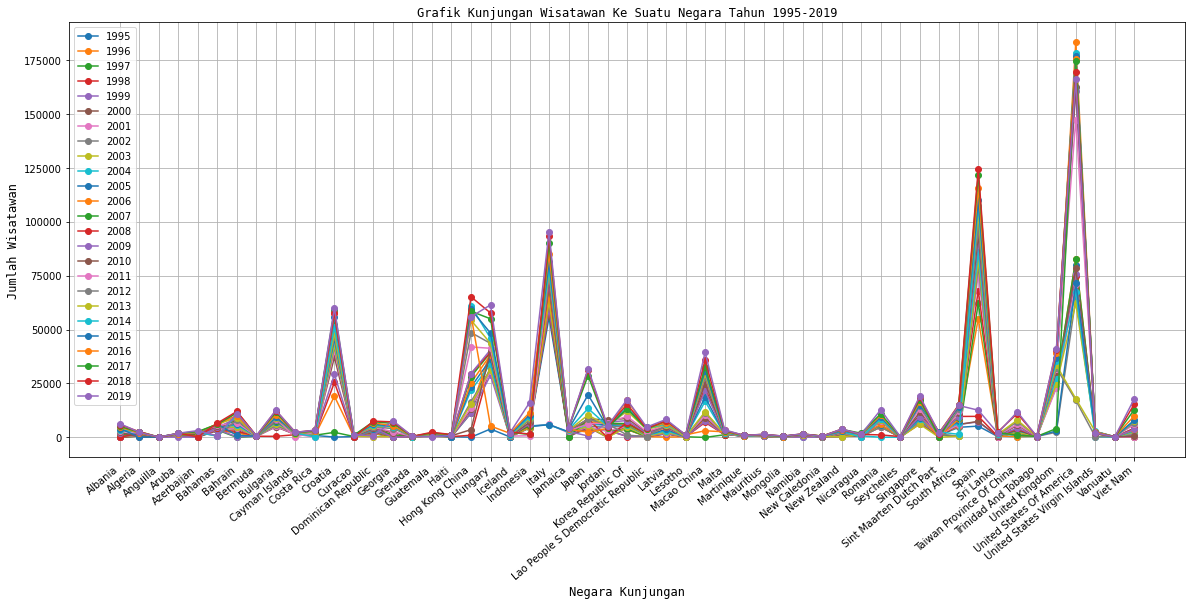

In [14]:
#Memvisualisasikan dataset kunjungan wisatawan kedalam grafik garis
import matplotlib.pyplot as plt
data_frame_per_tahun.plot(figsize=(20,8), marker='o', grid=True)
plt.title('Grafik Kunjungan Wisatawan Ke Suatu Negara Tahun 1995-2019', size='large', fontname = 'monospace')
plt.xticks(ticks=range(0,53), labels=data_frame_per_tahun.index, rotation=40, ha='right', fontname = 'sans-serif')
plt.xlabel('Negara Kunjungan', size='large', fontname = 'monospace')
plt.ylabel('Jumlah Wisatawan', size='large', fontname = 'monospace')
plt.legend()
plt.show()

# **Data Normalisasi**

In [15]:
#Konversi nilai aktual pada dataset kunjungan wisatawan menjadi nilai berskala antara 0 hingga 1
from sklearn.preprocessing import MinMaxScaler
np.set_printoptions(precision=8, suppress=True)
preprocessing_min_max                  = MinMaxScaler()
dataset_kedatangan_turis               = pd.read_csv("/content/drive/My Drive/final_program/dataset_kunjungan_wisatawan.csv", usecols=[3])
dataset_kedatangan_turis               = dataset_kedatangan_turis.values
dataset_kedatangan_turis               = dataset_kedatangan_turis.astype('int32')
dataset_normalisasi_kedatangan_turis   = preprocessing_min_max.fit_transform(dataset_kedatangan_turis)
dataframe_normalisasi_kedatangan_turis = pd.DataFrame(dataset_normalisasi_kedatangan_turis, columns=['Hasil Preprocessing'])
print('Hasil Normalisasi Data:')
print(dataframe_normalisasi_kedatangan_turis.to_markdown(tablefmt="grid", index=False))
print('Jumlah Dataset :',len(dataframe_normalisasi_kedatangan_turis),'Baris Data')

Hasil Normalisasi Data:
+-----------------------+
|   Hasil Preprocessing |
+=======================+
|           0.00162144  |
+-----------------------+
|           0.00280066  |
+-----------------------+
|           0.000545938 |
+-----------------------+
|           0.00494074  |
+-----------------------+
|           0.000469507 |
+-----------------------+
|           0.0176447   |
+-----------------------+
|           0.0125784   |
+-----------------------+
|           0.00300266  |
+-----------------------+
|           0.0436641   |
+-----------------------+
|           0.00566138  |
+-----------------------+
|           0.00500625  |
+-----------------------+
|           0.000840744 |
+-----------------------+
|           0.0021237   |
+-----------------------+
|           0.00982142  |
+-----------------------+
|           0.000425832 |
+-----------------------+
|           0.0019763   |
+-----------------------+
|           0.00303541  |
+-----------------------+
|           0.

In [16]:
#Menampilkan data preprocessing sebanyak 53 baris data teratas
data_preprocessing_jumlah = dataframe_normalisasi_kedatangan_turis[['Hasil Preprocessing']]
data_preprocessing_jumlah[['Hasil Preprocessing']].head(53)

,Hasil Preprocessing
0,0.001621
1,0.002801
2,0.000546
3,0.004941
4,0.000470
5,0.017645
6,0.012578
7,0.003003
8,0.043664
9,0.005661


In [17]:
#Membuat satu kolom baru dengan nama kolom prediction.
#Menggeser data sebanyak 53 baris pada kolom hasil preprocessing.
#Menambahkan data yang telah digeser ke kolom baru.
jumlah_shift_data = -53
data_preprocessing_jumlah['Prediction'] = data_preprocessing_jumlah[['Hasil Preprocessing']].shift(jumlah_shift_data)
#Menampilkan data
data_preprocessing_jumlah

,Hasil Preprocessing,Prediction
0,0.001621,0.001529
1,0.002801,0.003265
2,0.000546,0.000431
3,0.004941,0.005186
4,0.000470,0.001108
5,0.017645,0.018611
6,0.012578,0.010815
7,0.003003,0.003074
8,0.043664,0.037146
9,0.005661,0.006366


In [18]:
#Membuat dataset X kedalam bentuk array yang berisikan data aktual yang telah ternormalisasi sebelumnya
dataset_X = np.array(data_preprocessing_jumlah.drop(['Prediction'],1))
#Menghapus 53 baris data terakhir pada dataset X
dataset_X = dataset_X[:jumlah_shift_data]
print('Array X:\n',dataset_X)
print('Sum Array X:',len(dataset_X))
print('Shape Array X:',dataset_X.shape)

Array X:
 [[0.00162144]
 [0.00280066]
 [0.00054594]
 ...
 [0.01045471]
 [0.00187257]
 [0.08457125]]
Sum Array X: 1272
Shape Array X: (1272, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [19]:
#Membuat dataset y kedalam bentuk array yang berisikan data aktual yang telah ternormalisasi sebelumnya
dataset_y = np.array(data_preprocessing_jumlah['Prediction'])
#Menghapus 53 baris data terakhir pada dataset y (secara tidak langsung menghapus 53 data bertipe data NaN)
dataset_y = dataset_y[:jumlah_shift_data]
print('Array y:\n',dataset_y)
print('Sum Array y:',len(dataset_y))
print('Shape Array y:',dataset_y.shape)

Array y:
 [0.00152863 0.00326471 0.00043129 ... 0.01128454 0.00135939 0.09827975]
Sum Array y: 1272
Shape Array y: (1272,)


# **Data Splitting (Data Latih & Data Uji)**

In [20]:
#Persiapan fitur learning time series
#Input  = (t)
#Output = (t+1)
kolom_dataset_X  = pd.DataFrame(dataset_X,columns=['Input'])
kolom_dataset_y  = pd.DataFrame(dataset_y,columns=['Output'])
kolom_dataset_Xy = pd.concat([kolom_dataset_X, kolom_dataset_y], join = 'outer', axis = 1)
print(kolom_dataset_Xy.to_markdown(tablefmt="grid", index=False))

+-------------+-------------+
|       Input |      Output |
+=============+=============+
| 0.00162144  | 0.00152863  |
+-------------+-------------+
| 0.00280066  | 0.00326471  |
+-------------+-------------+
| 0.000545938 | 0.000431291 |
+-------------+-------------+
| 0.00494074  | 0.00518641  |
+-------------+-------------+
| 0.000469507 | 0.00110825  |
+-------------+-------------+
| 0.0176447   | 0.018611    |
+-------------+-------------+
| 0.0125784   | 0.010815    |
+-------------+-------------+
| 0.00300266  | 0.00307363  |
+-------------+-------------+
| 0.0436641   | 0.0371456   |
+-------------+-------------+
| 0.00566138  | 0.00636564  |
+-------------+-------------+
| 0.00500625  | 0.0050936   |
+-------------+-------------+
| 0.000840744 | 0.104154    |
+-------------+-------------+
| 0.0021237   | 0.00207456  |
+-------------+-------------+
| 0.00982142  | 0.0110825   |
+-------------+-------------+
| 0.000425832 | 0.000600532 |
+-------------+-------------+
| 0.001976

In [21]:
#Membagi dataset menjadi data latih dengan proporsi 90% dan data uji dengan proporsi 10% (90:10)
from sklearn.model_selection import train_test_split
x_latih, x_uji, y_latih, y_uji = train_test_split(dataset_X, dataset_y, test_size=0.10, shuffle=True)

In [22]:
#Menampilkan input(x_latih) dan output(y_latih) untuk data latih
print('List Train Data X:\n',x_latih)
print('Sum of Train Data X:',len(x_latih),'\n')
print('List Train Data Y:\n',y_latih)
print('Sum of Train Data Y:',len(y_latih))

List Train Data X:
 [[0.17323703]
 [0.00078615]
 [0.00657309]
 ...
 [0.00300812]
 [0.01095152]
 [0.00089534]]
Sum of Train Data X: 1144 

List Train Data Y:
 [0.17145181 0.00084074 0.00639293 ... 0.0033739  0.00117923 0.01109346]
Sum of Train Data Y: 1144


In [23]:
#Menampilkan input(x_uji) dan output(y_uji) untuk data uji
print('List Test Data X:\n',x_uji)
print('Sum of Test Data X:',len(x_uji),'\n')
print('List Test Data Y:\n',y_uji)
print('Sum of Test Data Y:',len(y_uji))

List Test Data X:
 [[0.01226177]
 [0.00727189]
 [0.26055435]
 [0.00451491]
 [0.00272423]
 [0.03286001]
 [0.00268601]
 [0.01126816]
 [0.95148795]
 [0.02621594]
 [0.00126658]
 [0.0025004 ]
 [0.04264321]
 [0.00171425]
 [0.00167057]
 [0.00301904]
 [0.58490154]
 [0.01312435]
 [0.10211223]
 [0.01065125]
 [0.00366324]
 [0.32645997]
 [0.0239503 ]
 [0.00882782]
 [0.00254953]
 [0.0028225 ]
 [0.01418893]
 [0.02839969]
 [0.02354084]
 [0.01424898]
 [0.00307363]
 [0.02553352]
 [0.01084233]
 [0.01151929]
 [0.01468573]
 [0.01462568]
 [0.00361411]
 [0.01068401]
 [0.04553122]
 [0.0015996 ]
 [0.01671116]
 [0.00121744]
 [0.00694433]
 [0.0024731 ]
 [0.02508039]
 [0.00219467]
 [0.00259866]
 [0.00720092]
 [0.01095152]
 [0.01578853]
 [0.00091718]
 [0.00310639]
 [0.00269147]
 [0.00207456]
 [0.02856347]
 [0.00251131]
 [0.87623587]
 [0.00072064]
 [0.0003221 ]
 [0.05282496]
 [0.0321612 ]
 [0.00342849]
 [0.39022007]
 [0.03671433]
 [0.00313368]
 [0.0080635 ]
 [0.07125582]
 [0.00714633]
 [0.01256749]
 [0.00530106]
 

# **SVR Forecasting**

In [24]:
#Impor modul svm dari scikit-learn untuk membuat model forecasting menggunakan SVR (Support Vector Regression)
from sklearn.svm import SVR
SVM_Forecasting = SVR(kernel="rbf", C=1000, gamma=0.00001, epsilon=0.00000001)
#Proses pelatihan model
print('Forecasting SVM Model:', SVM_Forecasting.fit(x_latih, y_latih))

Forecasting SVM Model: SVR(C=1000, epsilon=1e-08, gamma=1e-05)


In [25]:
#Menampilkan evaluasi keakuratan model forecasting SVR dalam memvalidasi data uji saat proses pelatihan
evaluasi_svm = SVM_Forecasting.score(x_uji, y_uji)
print('SVR Confidence: ', evaluasi_svm)

SVR Confidence:  0.8631190092493533


# **Hasil Prediksi Kunjungan Wisatawan**

In [26]:
#Melakukan prediksi pada data uji dan menampilkan hasil prediksi
hasil_prediksi = SVM_Forecasting.predict(x_uji)
hasil_prediksi

array([0.01141394, 0.00696775, 0.23265344, 0.00451116, 0.00291559,
       0.02976786, 0.00288154, 0.01052859, 0.84830166, 0.02384771,
       0.00161676, 0.00271614, 0.03848512, 0.00201565, 0.00197673,
       0.00317827, 0.52166046, 0.01218254, 0.0914746 , 0.0099789 ,
       0.00375229, 0.29137823, 0.02182893, 0.00835415, 0.00275992,
       0.00300315, 0.01313112, 0.02579353, 0.02146408, 0.01318463,
       0.00322692, 0.02323964, 0.01014916, 0.01075236, 0.0135738 ,
       0.01352029, 0.00370851, 0.01000809, 0.04105846, 0.00191349,
       0.01537854, 0.00157297, 0.00667588, 0.00269182, 0.02283589,
       0.00244373, 0.0028037 , 0.00690451, 0.01024645, 0.01455644,
       0.00130543, 0.00325611, 0.0028864 , 0.00233671, 0.02593946,
       0.00272587, 0.7812498 , 0.0011303 , 0.00077519, 0.04755749,
       0.0291452 , 0.00354311, 0.34819121, 0.03320222, 0.00328043,
       0.00767311, 0.06398019, 0.00685587, 0.01168636, 0.00521165,
       0.05578343, 0.0026675 , 0.00188917, 0.03006459, 0.06954

# **Data Denormalisasi**

In [27]:
#Denormalisasi data aktual uji kunjungan wisatawan
#Mengembalikan data hasil prediksi yang masih ternormalisasi menjadi data dengan nilai sebenarnya
denormalisasi_y_uji = preprocessing_min_max.inverse_transform([y_uji])
denormalisasi_hasil_prediksi = preprocessing_min_max.inverse_transform(hasil_prediksi.reshape(-1,1)).astype(int)
print('Aktual Data Uji:\n',denormalisasi_y_uji)
print('\nPrediksi Data Uji:\n',denormalisasi_hasil_prediksi)

Aktual Data Uji:
 [[  2502.   1061.  52271.   1038.    467.   6001.    482.   2302. 169325.
    4236.    296.    501.   8798.    357.    290.    610. 109834.   2624.
   21998.   1412.    675.  57998.   4645.   1737.    468.   5056.   2435.
    5496.   4233.   2574.    562.   4239.   2168.   2131.    285.    264.
     689.   2396.   8351.    293.   3438.    282.   1177.    445.   4394.
     465.    602.   1402.   2162.   3204.   1842.    474.    614.    422.
    5212.    471. 162275.    127.   5839.  11642.   6026.    678. 183178.
    8062.    584.   1521.  13725.   1502.   2495.   1011.  12045.    519.
     287.   7311.  13232.    646.    500.    277.   1743.   2409.   8533.
    2383.   2592.    508.    474.   2045.    722.  82756.    126.   3869.
     737.   9751.   1267.    371.   1481.    891.   1071.   1262.  59521.
   14318.    151.   5327.    114.   1233.    725.   1394.   1415.    102.
     967.    632.   1628.    177.   2702.   1172.  56655.   3519.   3274.
     387.   2253.   

# **Evaluasi RMSE & MAPE**

In [28]:
#Menampilkan data aktual uji kunjungan wisatawan dan data hasil prediksi kunjungan wisatawan serta hasil selisih dari keduanya
aktual_output_uji   = np.array(denormalisasi_y_uji.reshape(-1,1))
prediksi_output_uji = np.array(denormalisasi_hasil_prediksi)
kolom_aktual_uji    = pd.DataFrame(aktual_output_uji,columns=['Kunjungan Wisatawan Aktual']).astype(int)
kolom_prediksi_uji  = pd.DataFrame(prediksi_output_uji,columns=['Hasil Prediksi SVR']).astype(int)
hitung_selisih      = aktual_output_uji-prediksi_output_uji
kolom_selisih       = pd.DataFrame(hitung_selisih,columns=['Selisih']).astype(int)
gabung_kolom        = pd.concat([kolom_aktual_uji, kolom_prediksi_uji, abs(kolom_selisih)], join = 'outer', axis = 1)
gabung_kolom

,Kunjungan Wisatawan Aktual,Hasil Prediksi SVR,Selisih
0,2502,2097,405
1,1061,1283,222
2,52271,42622,9649
3,1038,833,205
4,467,541,73
5,6001,5459,542
6,482,534,52
7,2302,1935,367
8,169325,155391,13934
9,4236,4375,139


In [29]:
from sklearn.metrics import mean_squared_error
#Pengukuran selisih perbandingan secara keseluruhan antara data aktual dengan data hasil prediksi
#Evaluasi RMSE, dan MAPE

#Menghitung nilai Root Mean Squared Error (RMSE)
evaluasi_rmse = mean_squared_error(aktual_output_uji,prediksi_output_uji,squared=False)
print('Evaluasi RMSE : %.2f' % (evaluasi_rmse))

#Menghitung nilai Mean Absolute Percentage Error (MAPE)
def MAPE(aktual, prediksi):
    aktual, prediksi = np.array(aktual), np.array(prediksi)
    return np.mean(np.abs((aktual-prediksi)/aktual)) * 100
evaluasi_mape = MAPE(aktual_output_uji,prediksi_output_uji)
print('Evaluasi MAPE : %.2f' % (evaluasi_mape))

Evaluasi RMSE : 11126.36
Evaluasi MAPE : 56.00


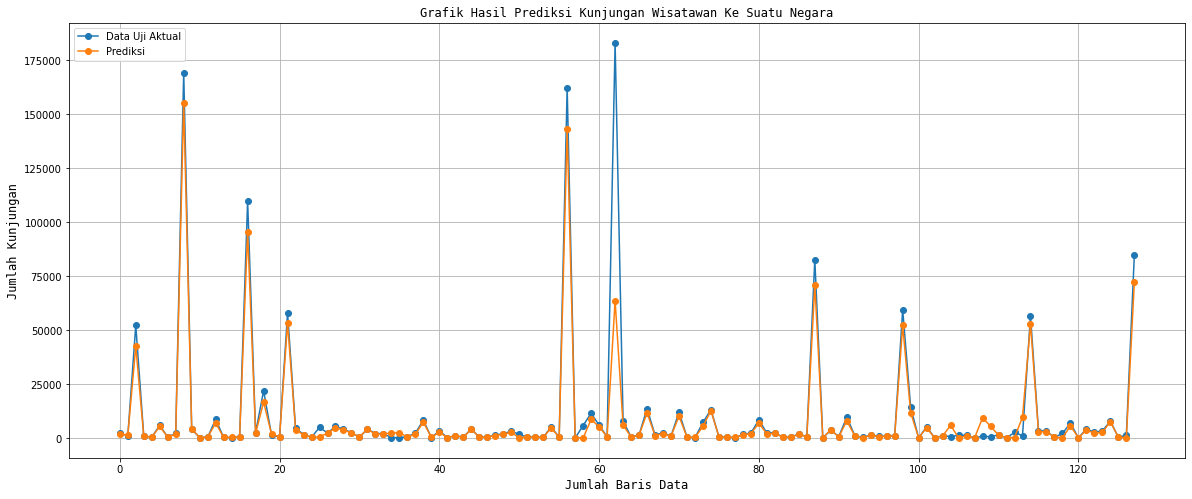

In [30]:
#Menampilkan data aktual uji dan data hasil prediksi dalam bentuk grafik garis
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.ticklabel_format(style='plain')
plt.grid(True)
plt.plot(aktual_output_uji, marker='o')
plt.plot(denormalisasi_hasil_prediksi, marker='o')
plt.title('Grafik Hasil Prediksi Kunjungan Wisatawan Ke Suatu Negara', size='large', fontname='monospace')
plt.xlabel('Jumlah Baris Data', size='large', fontname='monospace')
plt.ylabel('Jumlah Kunjungan', size='large', fontname='monospace')
plt.legend(['Data Uji Aktual','Prediksi'],loc="upper left")
plt.show()

# **Peramalan Mendatang**

In [31]:
#Mengambil 318 baris data terakhir dari kolom hasil preprocessing pada data aktual, kemudian mengkonversikannya dalam bentuk array
input_prediksi = -318
data_input     = np.array(data_preprocessing_jumlah.drop(['Prediction'],1))[input_prediksi:]
#Model SVR untuk memprediksi 318 baris data mendatang
svm_prediksi_mendatang = SVM_Forecasting.predict(data_input)
print('List Input Data',-(input_prediksi),'baris data terakhir:\n',data_input)
print('\nHasil Prediksi Mendatang:\n',svm_prediksi_mendatang)

List Input Data 318 baris data terakhir:
 [[0.02001409]
 [0.01252382]
 [0.00092809]
 [0.00945565]
 [0.01250744]
 [0.00341211]
 [0.05702322]
 [0.00312822]
 [0.05132909]
 [0.01084233]
 [0.00146857]
 [0.27930731]
 [0.00612542]
 [0.03040328]
 [0.02728052]
 [0.00207456]
 [0.00945565]
 [0.00611996]
 [0.33210497]
 [0.25100589]
 [0.00597802]
 [0.05147103]
 [0.42412281]
 [0.01909145]
 [0.07318844]
 [0.0290439 ]
 [0.07749589]
 [0.02266734]
 [0.03406107]
 [0.00585245]
 [0.17207418]
 [0.01176496]
 [0.00376151]
 [0.00577602]
 [0.00272423]
 [0.00776324]
 [0.0028498 ]
 [0.01554285]
 [0.00072064]
 [0.04604987]
 [0.00126658]
 [0.08237112]
 [0.01362115]
 [0.00789426]
 [0.58490154]
 [0.00905165]
 [0.00537203]
 [0.0024458 ]
 [0.19287988]
 [0.9734292 ]
 [0.01532448]
 [0.00175792]
 [0.04294894]
 [0.02251448]
 [0.00089534]
 [0.00097723]
 [0.00996337]
 [0.0109133 ]
 [0.03332951]
 [0.005241  ]
 [0.00322103]
 [0.05082682]
 [0.0114374 ]
 [0.01578853]
 [0.3049118 ]
 [0.00581424]
 [0.03342232]
 [0.02865628]
 [0.00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
#Membuat indeks kolom baru untuk negara yang diambil dari dataset kunjungan wisatawan
#Menampilkan mendatang kemudian disejajarkan dengan kolom hasil prediksi mendatang
kolom_negara_dan_tahun           = pd.read_excel("/content/drive/My Drive/final_program/negara dan tahun.xlsx")
denormalisasi_prediksi_mendatang = preprocessing_min_max.inverse_transform(svm_prediksi_mendatang.reshape(-1,1)).astype(int)
kolom_prediksi_mendatang         = pd.DataFrame(denormalisasi_prediksi_mendatang, columns=['Prediksi Mendatang'])
gabung                           = pd.concat([kolom_negara_dan_tahun, kolom_prediksi_mendatang], join = 'outer', axis = 1)
gabung

,Negara,TAHUN,Prediksi Mendatang
0,Albania,2020,3362
1,Algeria,2020,2140
2,Anguilla,2020,247
3,Aruba,2020,1639
4,Azerbaijan,2020,2137
5,Bahamas,2020,653
6,Bahrain,2020,9403
7,Bermuda,2020,606
8,Bulgaria,2020,8474
9,Cayman Islands,2020,1866


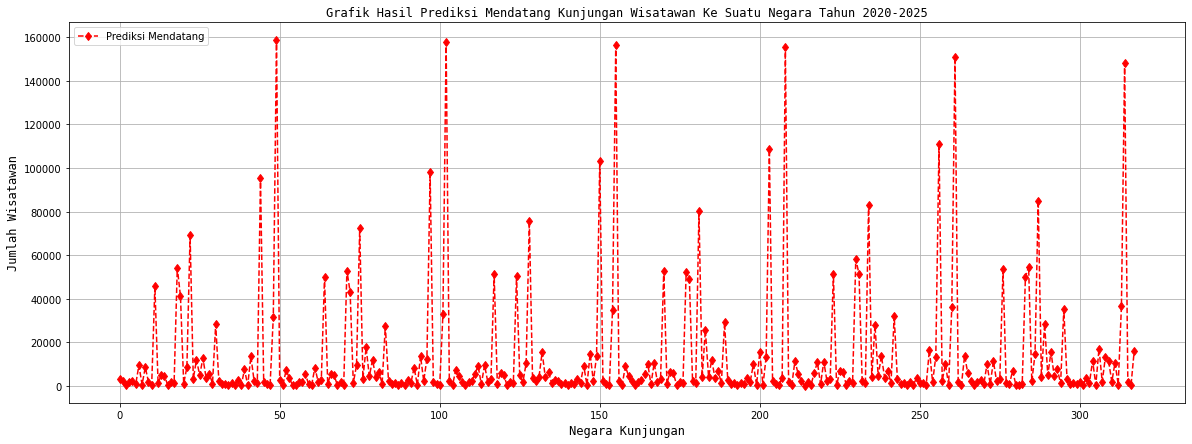

In [33]:
#Memvisualisasikan hasil prediksi kunjungan wisatawan ke suatu negara dimasa mendatang dalam bentuk grafik garis
import matplotlib.pyplot as plt
kolom_prediksi_mendatang.plot(figsize=(20,7), linestyle='--', marker='d', color='red')
plt.grid(True)
plt.title('Grafik Hasil Prediksi Mendatang Kunjungan Wisatawan Ke Suatu Negara Tahun 2020-2025', size='large', fontname='monospace')
plt.ticklabel_format(style='plain')
plt.xlabel('Negara Kunjungan', size='large', fontname='monospace')
plt.ylabel('Jumlah Wisatawan', size='large', fontname='monospace')
plt.legend(loc ="upper left")
plt.show()

In [34]:
#Menggabungkan dataset dengan data hasil prediksi masa depan
data_jumlah_turis_datang  = pd.read_csv("/content/drive/My Drive/final_program/dataset_kunjungan_wisatawan.csv", usecols=[3])
hasil_prediksi_mendatang  = pd.DataFrame(denormalisasi_prediksi_mendatang,columns=['Jumlah'])
data_keseluruhan          = data_jumlah_turis_datang.append(hasil_prediksi_mendatang, ignore_index=True)
data_keseluruhan

,Jumlah
0,304
1,520
2,107
3,912
4,93
5,3239
6,2311
7,557
8,8005
9,1044


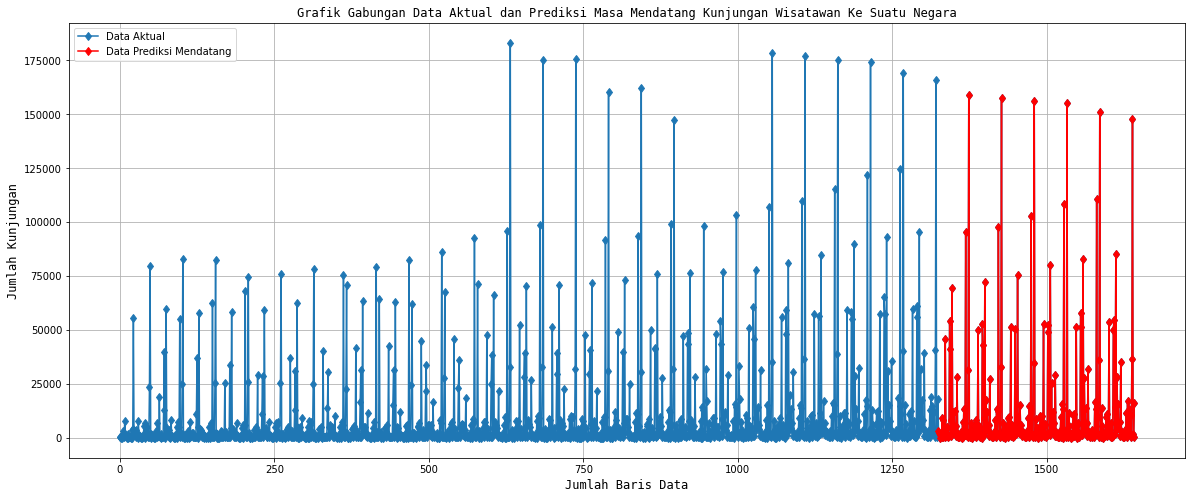

In [35]:
#Memvisualisasikan secara keseluruhan antara dataset dengan data hasil prediksi masa datang dalam bentuk grafik garis
plt.figure(figsize=(20,8))
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.plot(data_keseluruhan, marker='d')
plt.plot(data_keseluruhan.iloc[input_prediksi:],'-r', marker='d')
plt.title('Grafik Gabungan Data Aktual dan Prediksi Masa Mendatang Kunjungan Wisatawan Ke Suatu Negara', size='large', fontname='monospace')
plt.xlabel('Jumlah Baris Data', size='large', fontname='monospace')
plt.ylabel('Jumlah Kunjungan', size='large', fontname='monospace')
plt.legend(['Data Aktual','Data Prediksi Mendatang'], loc='upper left')
plt.show()